# CITS4419 Dataset: Wi-Fi Strength and Quality Around Walkways at the University of Western Australia, Crawley

***Akhil Naseem 22237476***

***Alex Brown 21955725***

## Abstract

This dataset presents the Wi-Fi signal strength and quality around the walkways in the Crawley campus of the University of Western Australia. Students who arrive and depart from the campus usually walk through the long stretches of walkways on the north side of campus. So, there is much opportunity for providing wi-fi network access to campus patrons with mobile phones and other devices along these routes. Additionally, these walkways are adjacent to popular outdoor seating areas on the edges of ovals and cafes. Therefore, it is another reason to be points of interest to assess the Wi-Fi coverage.

Using a bash script on a consumer laptop, the dataset records RSSI and GPS coordinates of the *Unifi* network. The walkways of interest are the four around James Oval, two parallel on either side of the Great Court, and two parallel on either side of Whitfeld Court.

## 1. Motivation

As university students, our initial aim was to map the Wi-Fi coverage of all outdoor grass seating areas on campus. Many students spend time on ovals and benches outside buildings to study or socialise in the warmth of sunshine and fresh air. However, not all locations have good Wi-Fi coverage. And given that students stream lectures and other video content on a regular basis, having good signal strength is important in delivering content to devices away from most access points.

Though the project seemed straightforward, we experienced a number of setbacks (more in section 3.3), which forced us to shrink our scope to be adjusted and limited to only a subset of the most used pedestrain walkways along locations of interest. These walkways along Reid Library, James Oval and Winthrop Hall are almost always busy with patrons commuting to and from campus.

As students of CITS5506 The Internet of Things, the motivation for this project adjusts to providing network coverage statistics for future work in wireless campus surveillance systems, automated parking infrastructure, Wi-Fi storage lockers etc.

## 2. Background

### 2.1 University Campus

The 65-hectare Crawley campus sits on the Swan River, about 5 kilometres west of the Perth central business district. The campus can be loosely divided into north and south at the end of Wilsmore Lecture Theatre (inline with the end of James Zone 4).

The walkways in our scope are all situated on the north side of campus. The three locations are James Oval (four zones), Reid Library (Great Court, two zones), and Whitfeld Court (two zones). The different zones are illustrated in the map below.

The fact that all zones are approximately parallel or perpendicular to compass-north helped in generating GPS coordinates for each interval reading (more in section 3.2).

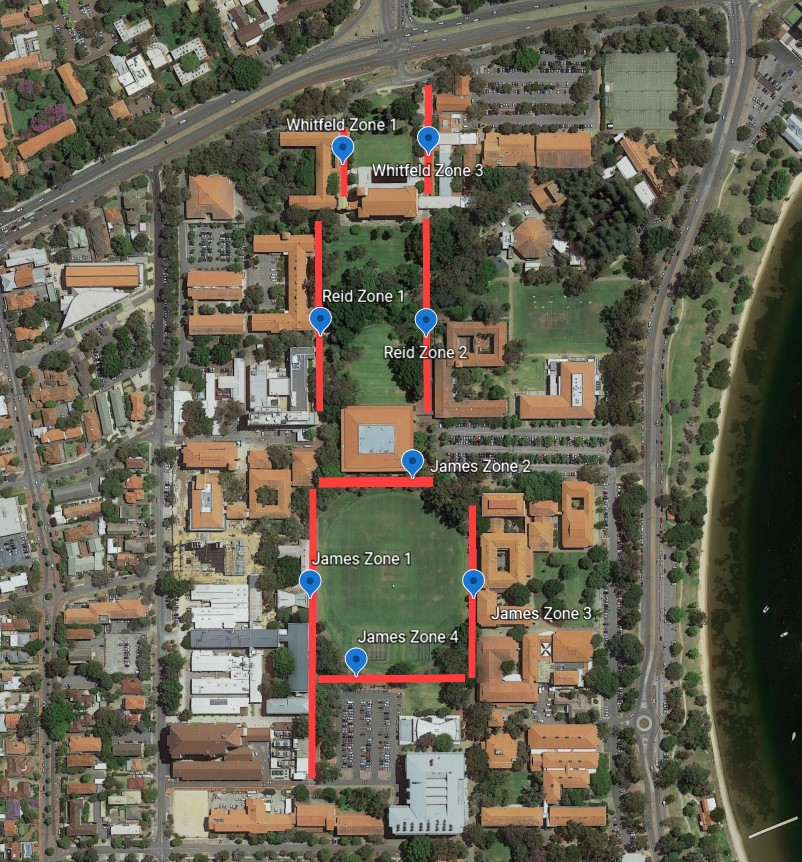

In [1]:
from IPython.display import display, Image
display(Image(filename='./assets/campus_map.jpg', width=700, height=700))

### 2.1 Wi-Fi and Wireless Communication Metrics

#### 2.1.1 What is Wi-Fi?

Contrary to popular belief, Wi-Fi is not an acronym for 'Wireless Fidelity'. It is instead a trademark name for the IEEE 802.11x standard for wireless communication (source: https://www.webopedia.com/DidYouKnow/Computer_Science/wifi_explained.asp). 

The 802.11x standard is part of a set of protocols that specifies the Media Access Control (MAC) and physical layer protocols for implementing Wireless Local Area Networks (WLAN). The protocol enables communication between Wi-Fi devices, including wireless routers and access points.

#### 2.1.2 Network Identification Terminology

**SSID**: A service set is the set of all devices associated with a particular Wi-Fi network using a 32-byte Service Set Identfier (SSID), i.e. the name of the WLAN.

**BSSID**: However, there are usually multiple access points within each WLAN, and there has to be a way to identify those access points and their associated clients. This identifier is called a basic service set identifier (BSSID) and is included in all wireless packets.

**ESSID**: An extended basic service set (ESS) consists of all of the BSSs in the network. For all practical purposes, the ESSID identifies the same network as the SSID does. The term SSID is used most often.

#### 2.1.3 Wireless Communication Metrics

There are multiple metrics for measuring the quality of a wireless network. We introduce a few below.

<u>Path Loss</u>

Path Loss is the reduction in power density of an electromagnetic wave as it propagates through space. Path Loss is measured in dB using one of multiple models that estimate for different environments:


$P_t$: transmission power <br>
$P_r$: receiving power <br>
$d$: distance <br>
$d_0$: reference distance (1m) <br>
$L_0$: constant depending on transmission frequency <br>
$n$ and $B$: environment specific constants <br>
$h_T$: height of transmitter antenna <br>
$h_R$: height of receiver antenna <br>
$K$: constant accounting for system losses

Free Space Model: $$P_r = {L_0 P_t \over d^2}$$

Exponent Model: $$L = 10nlog_{10}(d) - K (dBm)$$

Antenenna Height Model: $$L  = 10nlog_{10}(d) - 20log_{10}(h_T) - 20log_{10}(h_R)$$

Log Distace Model: $$L = B + 10nlog_{10}({d \over d_0})$$


<u> Signal-to-Noise Ratio </u>

The Signal-To-Noise Ratio (SNR) is the power ratio between the signal strength and the background noise level (noise floor). This value is represented as a +dBm value. Generally, a signal with an SNR value of 20dBm or more is recommended for data networks where as an SNR value of 25dBm or more is recommended for networks that use voice applications.


<u> Received Signal Strength Indicator </u>

Received Signal Strength Indicator (RSSI) is an estimated measurement of how well a device can detect and receive signals from any access point in the network. It is measured in dBm from 0 (strong) to -120 (weak).
    
The measurement of RSSI represents the relative quality of a signal that will be received on a device. It indicates the power level that is being received after any possible loss at the antenna and cable level. Hence, the higher the value of RSSI, the stronger the signal is.
    
Signal Strength (dBm) | Rating
------------ | -------------
-50 to 0 | Excellent
-60 to -50  | Good
-70 to -60 | Fair
-80 to -70 | Weak
-120 to -80 | Very Weak


## 3. Methodology

The project required two aspects of data recording - Wi-Fi signals and GPS coordinates. In this section, we discuss the final methodology used for recording the data, followed by earlier attempts and lessons learnt.


### 3.1 Recording Wi-Fi metrics

To record the Received Signal Strength Indicator (RSSI) of Wi-Fi access points across the UWA campus, we decided to use a laptop since we believed that the Wi-Fi card on the laptop would have a similar specification to other devices that students would use. Below is a print out of the specification of the Wi-Fi card that was used for this experiment.

```bash
$ lspci | grep -i wireless
00:14.3 Network controller: Intel Corporation Wireless-AC 9560 [Jefferson Peak] (rev 10)

$ lshw -C network
  *-network                 
       description: Wireless interface
       product: Wireless-AC 9560 [Jefferson Peak]
       vendor: Intel Corporation
       physical id: 14.3
       bus info: pci@0000:00:14.3
       logical name: wlp0s20f3
       version: 10
       serial: 4c:1d:96:7f:d0:05
       width: 64 bits
       clock: 33MHz
       capabilities: pm msi pciexpress msix bus_master cap_list ethernet physical wireless
       configuration: broadcast=yes driver=iwlwifi driverversion=5.4.0-47-generic firmware=46.6bf1df06.0 ip=10.0.0.65 latency=0 link=yes multicast=yes wireless=IEEE 802.11
       resources: irq:16 memory:a4418000-a441bfff
```

We then used a built in Unix wireless network utility called `iwlist` to scan all the Wi-Fi signals from access points in an area. Then used `grep`, `sed`, `awk` and `csvformat` (a script for formatting csv files) to filter the output from `iwlist` into csv format.

The bash script `single_wifi_scan.sh` located in the `data` folder, combines all of these different tools and allows us to scan Wi-Fi signals and save the results from the access points with the same External Service Set Identifier (ESSID) in a csv file. For scanning the Wi-Fi access points at UWA, the ESSID is 'Unifi'. The outputted csv stores the Basic Service Set Identifier (BSSID) of the access point, the time it was recorded and the RSSI signal strength in decibels.

Each measurement that we take for a zone is saved to a folder with the same name as the zone and is named after the time that the `single_wifi_scan.sh` was executed.

For an example, if we were measuring the wifi signal strengths at zone 'whitfeld-1' and `single_wifi_scan.sh` was executed at the formatted time of 20-09-12-15-48-14 (Year-Month-Day-Hour-Minute-Second), the output file will be saved to `data/wifi/whitefeld-1/20-09-12-15-48-14.csv`.

The reason for this methodolgy of measuring Wi-Fi signals is so that we can directly correlate our Wi-Fi measurements to locations that we record for a zone. This will be discussed in more detail in the next section.


### 3.2 Recording GPS Coordinates

For applications of mapping network coverage over small distances, our testing with GPS modules in mobile phones provided an average accuracy of 20m. This was far too unreliable for our use-case. Therefore, we resorted to a more manual approach using a 30m measuring tape as follows:

1. Move to starting point at location of interest.
2. Use Google Maps (satellite view) to manually estimate current location based on matching surrounding environment (edge of building, treelines, markings on path etc).
3. Record decimal coordinates of starting point.
4. Use measuring tape to mark intervals of 5m from starting point till end of pathway.
5. Record Wi-Fi readings at each interval.
6. Based on the starting point coordinates and intervals of 5m, use Excel to create estimations for coordinates of each interval by adding/subtracting the latitude/longitude values (formulas sourced from: https://bluemm.blogspot.com/2007/01/excel-formula-to-calculate-distance.html)

The Excel sheet for the GPS data is attached in the `/data/gps` directory. We chose 5m to be our interval distance as it provides enough datapoints to look for trends without being overly time and effort consuming.

### 3.3 Early Methological Flaws and Lessons Learnt

Earlier attempts to record data saw a number of setbacks caused by poor pre-testing of equipment used. Initially, we planned to record the Wi-Fi data and GPS data synced by absolute time, i.e. to continuously record data at set time intervals as we move  along the path with more or less a constant pace. However, the following errors occured:

**Mobile phone GPS**: the GPS module on the mobile phone proved to be unreliable as it would take several seconds to lock onto a set of coordinates and accuracy per record would vary significantly between 8m-20m.

**Bash script**: the customised bach script would sometimes throw errors when interfacing with Wi-Fi card when it is busy. This would then halt the recording for a couple of intervals and then continue. This would not only give us fewer datapoints but also put our time-based matching with the GPS data out of sync.

Reflecting on these flaws in our methodology, we resorted to sync data by record indices instead, i.e. matching index of regularly distanced coordinates to index of on-click Wi-Fi readings. By taking control of when and where the recordings were made, it allowed for ensuring accuracy and verification of successful attempts at each interval.


## 4. Results

This section presents the dataset for each location within python dataframes. The columns of each dataframe are:

1. **lat**: latitude of the coordinate.
2. **lon**: longitude of the coordinate.
3. **time**: absolute time of the measurement.
4. **bssid**: BSSID of the access point being measured.
5. **quality**: ratio of packets that were succesfully sent to the access point. For the WiFi card that was used for this experiment this ratio is determined by sending 70 packets.
6. **rssi**: Received Signal Strength Indicator that our laptop received from the access point.
7. **essid**: Externel Service Set Identifier for the access point. For UWA this is 'Unifi'.

The data from each zone are then combined together to make one dataframe per location, which are shown below.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from ipyleaflet import (Map, Marker, basemaps, basemap_to_tiles,
                        FullScreenControl, LayersControl, LayerGroup,
                        WidgetControl, Circle
                       )
from ipywidgets import HTML, Layout, Dropdown, Output, Textarea, VBox, Label
from datamanager import load_wifi_at_location

In [3]:
james_oval_data = load_wifi_at_location('james')
james_oval_data

,index,lat,lon,time,bssid,quality,rssi,essid
0,0,-31.981019,115.817290,20-09-15-15-54-31,A0:CF:5B:3C:35:9F,0.614286,-67,Unifi
1,1,-31.981019,115.817290,20-09-15-15-54-31,A0:CF:5B:3C:35:90,0.542857,-72,Unifi
2,2,-31.981019,115.817290,20-09-15-15-54-31,7C:21:0E:3E:6A:6F,0.414286,-81,Unifi
3,3,-31.981019,115.817290,20-09-15-15-54-31,A0:CF:5B:3C:2E:B0,0.414286,-81,Unifi
4,4,-31.981019,115.817343,20-09-15-15-54-42,A0:CF:5B:3C:35:9F,0.400000,-82,Unifi
...,...,...,...,...,...,...,...,...
884,147,-31.979758,115.818735,20-09-15-17-30-11,A0:CF:5B:3F:85:0F,0.428571,-80,Unifi
885,148,-31.979758,115.818735,20-09-15-17-30-11,7C:21:0E:3E:68:AF,0.500000,-75,Unifi
886,149,-31.979758,115.818735,20-09-15-17-30-11,70:DF:2F:C6:59:2F,0.357143,-85,Unifi
887,150,-31.979758,115.818735,20-09-15-17-30-11,A0:CF:5B:3C:2E:B0,0.314286,-88,Unifi


In [4]:
reid_path_data = load_wifi_at_location('reid')
reid_path_data

,index,lat,lon,time,bssid,quality,rssi,essid
0,0,-31.978739,115.817220,20-09-15-17-45-45,7C:21:0E:3E:6A:AF,0.542857,-72,Unifi
1,1,-31.978739,115.817220,20-09-15-17-45-45,A0:CF:5B:3D:5E:F0,0.442857,-79,Unifi
2,2,-31.978739,115.817220,20-09-15-17-45-45,7C:21:0E:3E:6A:A0,0.428571,-80,Unifi
3,3,-31.978739,115.817220,20-09-15-17-45-45,A0:93:51:84:01:0F,0.371429,-84,Unifi
4,4,-31.978739,115.817220,20-09-15-17-45-45,A0:CF:5B:3C:33:DF,0.385714,-83,Unifi
...,...,...,...,...,...,...,...,...
776,253,-31.978800,115.818257,20-09-15-18-09-37,7C:21:0E:3E:6F:AF,0.442857,-79,Unifi
777,254,-31.978800,115.818257,20-09-15-18-09-37,78:72:5D:77:F2:EF,0.700000,-61,Unifi
778,255,-31.978800,115.818257,20-09-15-18-09-37,58:AC:78:ED:0C:1F,0.442857,-79,Unifi
779,256,-31.978800,115.818257,20-09-15-18-09-37,A0:CF:5B:3D:7B:1F,0.528571,-73,Unifi


In [5]:
whitfeld_oval_data = load_wifi_at_location('whitfeld')
whitfeld_oval_data

,index,lat,lon,time,bssid,quality,rssi,essid
0,0,-31.976879,115.817472,20-09-12-15-48-16,A0:CF:5B:3D:5F:90,0.600000,-68,Unifi
1,1,-31.976879,115.817472,20-09-12-15-48-16,A0:CF:5B:3D:5F:9F,0.514286,-74,Unifi
2,2,-31.976879,115.817472,20-09-12-15-48-16,A0:CF:5B:3D:7F:90,0.514286,-74,Unifi
3,3,-31.976879,115.817472,20-09-12-15-48-16,38:ED:18:D0:EF:6F,0.442857,-79,Unifi
4,4,-31.976879,115.817472,20-09-12-15-48-16,40:CE:24:C4:DB:2F,0.385714,-83,Unifi
...,...,...,...,...,...,...,...,...
176,87,-31.976034,115.818277,20-09-12-16-17-46,64:AE:0C:C4:EC:00,0.471429,-77,Unifi
177,88,-31.975984,115.818277,20-09-12-16-17-56,A0:CF:5B:3D:82:70,0.428571,-80,Unifi
178,89,-31.975984,115.818277,20-09-12-16-17-56,A0:CF:5B:3F:8A:C0,0.400000,-82,Unifi
179,90,-31.975984,115.818277,20-09-12-16-17-56,A0:CF:5B:3D:82:7F,0.385714,-83,Unifi


## 5. Discussion

In this section, we will plot the datapoints from the results in the previous section on an interactive map and also gain insights into the number of strong and weak readings on a histogram. 

The helper functions and `WiFiMap` class below is used to create the Wi-Fi map showing the access point that had the best RSSI measurement and colour coding it. The colour code is:

* <span style="color:#0A75F0">**Excellent**</span>: The RSSI value is above -50 dBm.
* <span style="color:#0AF01D">**Good**</span>: The RSSI value is between -50 dBm and -60 dBm.
* <span style="color:#FFFB08">**Fair**</span>: The RSSI value is between -60 dBm and -70 dBm.
* <span style="color:#FF0C08">**Weak**</span>: The RSSI value is between -70 dBm and -80 dBm.
* <span style="color:#3D0600">**Very Weak**</span>: The RSSI value is below -80 dBm. At this level devices would have an unreliable connection with the access point.

### 5.1 Helper Function: Classify Wi-Fi Strength

In [6]:
def classify_wifi_strength(rssi):
    """
    Categories for WiFi RSSI Measurements
        Excellent: x >= -50 dBm
        Good: -50 dBm > x >= -60 dBm 
        Fair: -60 dBm > x >= -70 dBm
        Weak: -70 dBm x
        
    Parameters:
        rssi:integer
            The RSSI value
        
    Returns:
        The category of the WiFi signal strength
    """
    if rssi >= -50: return 'Excellent'
    elif rssi < -50 and rssi >= -60: return 'Good'
    elif rssi < -60 and rssi >= -70: return 'Fair'
    elif rssi < -70 and rssi >= -80: return 'Weak'
    return 'Very Weak'

STRENGTH_COLOUR = {
    # Blue for Excellent
    'Excellent' : '#0A75F0',
    # Green for Good
    'Good' : '#0AF01D',
    # Yellow for Fair
    'Fair' : '#FFFB08',
    # Red for Weak
    'Weak' : '#FF0C08',
    # Black for Very Weak
    'Very Weak' : '#3D0600'
}

### 5.2 Helper Function: Generate Map

In [7]:
class WiFiMap:
    """
    Class for creating maps of WiFi RSSI values and selecting specific Access Points to look at.
    """
    
    
    RADIUS_MODIFIER = 0.5
    CIRCLE_OPACITY = 1.0
    CIRCLE_WEIGHT = 1
    HTML_TEXT = "<b>Showing Access Point:</b> {access_point}"
    
    def __init__(self, wifi_df, length):
        """
        Initialises the WiFiMap class
        
        Parameters:
            wifi_df: pandas.dataframe
                The Dataframe with the WiFi measurements and locations
                
            length: integer
                distance between measurements in dataframe
        """
        self.wifi_df = wifi_df
        self.current_df = wifi_df
        self.length = length
        
        self.best_rssi_layer = LayerGroup(name='RSSI Values')
        
        self.map = Map(
            basemap = basemaps.Esri.WorldImagery,
            center = self.get_average_location(),
            zoom = 100
        )
        
        self.map.add_layer(self.best_rssi_layer)
        self.map.add_control(FullScreenControl())
        self.map.add_control(LayersControl(position='topright'))
        self.create_dropdown()
        
    def create_dropdown(self):
        """
        Creates a dropdown bar for selecting access points to look at
        """
        self.dropdown = Dropdown(
            options = ['All Access Points'] + list(self.wifi_df['bssid'].unique()),
            layout = Layout(width='auto')
        )
        
        self.html = HTML(
            value = WiFiMap.HTML_TEXT.format(access_point = 'All Access Points')
        )
        
        def on_ap_select(change):
            """
            Handler function for updating map and text
            """
            new_ap = self.dropdown.value
            self.html.value = WiFiMap.HTML_TEXT.format(access_point = new_ap)
            if new_ap == 'All Access Points':
                self.current_df = self.wifi_df
            else:
                self.current_df = self.wifi_df.loc[self.wifi_df['bssid'] == new_ap]
            self.update_map()
            
        self.dropdown.observe(on_ap_select, names='value')
        
    def update_map(self):
        """
        Updates the map by plotting all of the points colour coded by best RSSI recording if All Access Points
        is selected.
        
        If the user selects a specific access point then it will just display those points.
        """
        self.best_rssi_layer.clear_layers()
        best_strengths = self.current_df.groupby(['lat', 'lon'])['rssi'].max()
        
        for loc, rssi in best_strengths.items():
            colour = STRENGTH_COLOUR[classify_wifi_strength(rssi)]
            circle = Circle(
                location = loc,
                color = colour,
                fill_color = colour,
                fill_opacity = WiFiMap.CIRCLE_OPACITY,
                radius = int(self.length*WiFiMap.RADIUS_MODIFIER),
                opacity = WiFiMap.CIRCLE_OPACITY,
                weight = WiFiMap.CIRCLE_WEIGHT
            )
            self.best_rssi_layer.add_layer(circle)
    
    def display_map(self):
        """
        Displays the Map and Dropdown bar
        """
        self.update_map()
        return VBox([self.map, self.html, self.dropdown])
        
    def get_average_location(self):
        """
        Gets the Average Location for initialising the graph.
        """
        data_df = self.current_df
        return(data_df['lat'].mean(), data_df['lon'].mean())

### 5.3 Helper Function: Histogram of RSSI Values

In [8]:
def display_rssi_hist(data, title, x_label, y_label):
    """
    Displays the Histogram of RSSI values in the colour code of Excellent, Good, Fair and Weak
    
    Parameters:
        data: pandas.DataFrame
            the dataframe to plot the RSSI values from
            
        title: str
            the title of the histogram
            
        x_label: str
            the label of the x axis
            
        y_label: str
            the label of the y axis
    """
    rssi_values = data['rssi']
    
    p = rssi_values.plot(kind = 'hist', bins=50, figsize=(10,10))
    
    for i, rectangle in enumerate(p.patches):
        p.patches[i].set_color(STRENGTH_COLOUR[classify_wifi_strength(rectangle.xy[0])])
    
    p.set_title(title)
    p.set_xlabel(x_label)
    p.set_ylabel(y_label)

### 5.4 James Oval Wi-Fi Map

In [9]:
james_oval_map = WiFiMap(james_oval_data, 5)
james_oval_map.display_map()

### 5.5 Reid Wi-Fi Map


In [10]:
reid_path_map = WiFiMap(reid_path_data, 5)
reid_path_map.display_map()

### 5.6 Whitfeld Court Wi-Fi Map


In [11]:
whitfeld_oval_map = WiFiMap(whitfeld_oval_data, 5)
whitfeld_oval_map.display_map()

### 5.7 North Walkways Wi-Fi Map


In [12]:
all_data = pd.concat([james_oval_data, reid_path_data, whitfeld_oval_data]).reset_index()
northern_uni_map = WiFiMap(all_data, 5)
northern_uni_map.display_map()

### 5.8 Histogram of RSSI Signal Strength Along All Paths


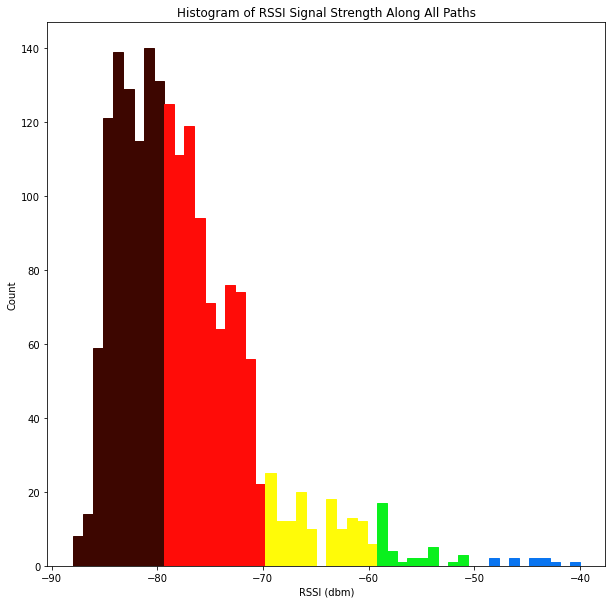

In [13]:
display_rssi_hist(all_data, 'Histogram of RSSI Signal Strength Along All Paths', 'RSSI (dbm)', 'Count')

From our experiments, we have shown that the majority of the Unifi access points have at least a weak signal when walking along the paths and a significant portion of those access points have a 'Very Weak' signal.

### 5.9 The Best AP Signal


Although most of the best peforming access points had a 'Fair' signal quality at best, there was one access point located somewhere around Student Services that had relatively 'Excellent' signal quality. This access point had a BSSID of `7C:21:0E:3E:6A:6F` and the measurements that we recorded of it are shown below.

In [14]:
best_ap = all_data.loc[all_data['bssid'] == '7C:21:0E:3E:6A:6F']
best_ap_map = WiFiMap(best_ap, 5)
best_ap_map.display_map()

Amazingly, we were able to measure the signal from this access point from all of the way across James Oval! It demonstrates that a single access point can cover a large outdoor area if it has a high transimission power and is effectively positioned to cover as much open space as possible with minimal physical obstacles.

However, it does raise the question if a few strategically placed high transmission power access points near paths would be the best strategy in reality. Access points use a specific channel for sending and receiving packets from devices, and if there are too many packets being transmitted on this channel then it would significantly degrade the quality of the channel. Considering this, it may be possible that the best strategy would be what the University's IT department is doing, which is ignoring the issue and prioritising indoor WiFi connectivity.

Looking at the rest of the data that we have gathered, the worst performing section on campus is the northen section of `reid-2` near Winthrop hall, which shows a deadspot. This is most likely because the closest building for this section is Winthrop Hall that has thick walls that can inhibit the propagation of the WiFi signals.

A surprising observation are the weak signals passing along the old EMS building near James oval, except for where the Makers Lab is located inside the building. This could show a possible consequence of the plans for moving the EMS faculty to the new EZone building that was constructed this year, and the use of the building has decreased. However, that is only speculation and the most likely cause is due to the positioning, transmitting strength and number of access points that are inside the building.

## 6. Limitations of Dataset and Recommendations

Based on the expriences gained through this project, we have identified a set of limitations to our methods and make recommendations to improve the overall quality of the dataset.

### 6.1 Limitations

1. Due to the adjusted aim and methodology, the scope of the dataset had to be narrowed to a subset of walkways on the north side of campus.
2. The dataset only considers one recording per distance interval, so the sample size is limited to one trial only.
3. Inferences are made considering RSSI only.
4. All datapoints are collected on the same day, so temporal variations cannot be explored.

### 6.2 Recommendations

1. Use external GPS modules with higher accuracy.
2. Perform multiple trials over period of days for long-term validity of spatial and temporal variation.
3. Consider recording other metrics like SNR, and end-user metrics like Packet Delivery Rate and Bit Error Rate (BER).
4. Expand locations of interest to edges of ovals, non-teaching buildings (like the Refectory), parking lots etc.
5. Expand scope to measure Wi-Fi data for all available ESSIDs.
